# Assignment 4 Mandatory part: Reinforcement learning; one-step Q-learning

(MMS131, 2023)

Contributors: Mats Granath, Jonatan Wårdh, Oleksandr Balabanov, and Basudha Srivastava

### Questions or topics that should be addressed as part of the assignment are marked Q.

## Introduction

In this project we will look at reinforcement learning (RL), which is a machine learning method that deals with  problems where we are trying to find an optimal way of maneuvering in an environment that can give rewards or penalties depending on our actions. Examples are learning to play board games (https://www.youtube.com/watch?v=TnUYcTuZJpM) or computer games (https://youtu.be/cUTMhmVh1qs) or having a robot learn to walk by trial and error (https://www.youtube.com/watch?v=gn4nRCC9TwQ).   

There is a well developed body of theory around these types of problems (see Sutton and Barto book), but in the spirit of this course we will concentrate on a small part of the topic and consider a practical excercise. In particular we will focus on the RL method known as "one-step Q-learning", as it is conceptually quite simple (but powerful) and often used in practice. 


#### Basic definitions and theory. 

We consider a type of game where an "agent" takes at each time step an "action" $a$, for example taking a step in some direction or placing a stone on a Go board. Before taking the action, the system or environment that the agent lives in is in some "state" $s$. (I.e. for a game of Go, the state is the configuration of stones on the board.) After the action the environment responds in some way (the agents stone is placed and the opponent places a stone) resulting in a new state of the system $s'$. In the general case the transition $s\rightarrow s'$ would result in some reward $r$ given to the agent (negative or positive or zero). (For the Go game the reward maybe only given at the end, positive if the game is won, negative if it's lost. This is a problem with so called sparse-reward, which is particularly difficult.) 

The objective of the game is to get to the end of the game with the the highest "return", $R$ where return is the cumulative reward. When calculating the return it is customary (and important for many problems) to use a discounting factor $0<\gamma\leq 1$, that implies that reward further on is less valuable than immediate reward. With this, the return at time $t$ is defined as $R_t=\sum_{t'=t}^\infty\gamma^{t'-t}r_{t'}$, where there is an implicit assumption that we are following some particular sequence of actions with the corresponding rewards. 

To decide what action $a$ to take in a given state $s$ the agent uses a policy $\pi(s,a)$, which could correspond to a unique choice or a probability distribution. We are interested in finding the "optimal" policy $\pi_{opt}$, that in any state $s$ will give the maximum return when following it to the end.

A useful object to quantify the whole proceedure is the "action-value" function $Q(s,a)$. It is defined as the return given by taking $a$ in $s$ and subsequently following the optimal policy, which can be written in an iterative form $Q(s,a)=r+\gamma\max_{a'}Q(s',a')$. Thus, correspondingly, the optimal policy will in fact be the one that in each step uses the action that maximizes $Q$, i.e. to find  $\pi_{opt}$ we should calculate $Q$.

To calculate $Q$ we need to explore the set of states, taking different actions, and collect rewards. There are different ways of doing this, but a standard way is to do "one-step Q-learning" using an $\epsilon$-greedy policy. It goes as follows:

$\bullet$ in state $s$ use your current estimate of $Q(s,a)$ to decide on a best action $a$ (maximizing $Q$). Use this action with probability $1-\epsilon$, but with probability $\epsilon$ take a random action. $0\leq\epsilon\leq 1$ is a parameter that quantifies a trade off between exploiting the current best estimate of the optimal policy and to explore the full space of possible rewards. (For problems with very big state-action space it is not possible to explore the full space, thus necessary to use a small $\epsilon$, while for small worlds one can even use $\epsilon=1$.) 

$\bullet$ feed action $a$ to the environmment that will respond by moving to state $s'$ and giving reward $r$. 

$\bullet$ this last move provides an estimate 
$r+\gamma\max_{a'}Q(s',a')$ for $Q(s,a)$. (Note that this is not necessarily the correct value for $Q(s,a)$ as the next time you take action $a$ in state $s$ you may get a different reward, $Q(s',a')$ may have changed, and you may even end up in a different state $s'$ if there is some stochastic ingredient in moving between states.) Increment your value (estimate) by mixing in some part ($\alpha<1$) of the most recent estimate 
$Q(s,a)\leftarrow(1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$. (This is what "one-step" implies; we could have explored further, weighing the rewards of several steps into the upgrade of $Q$.)

$\bullet$ keep playing,from state $s'$ take another $\epsilon$-greedy action $a'$ to state $s''$ and update $Q(s',a')$. (Restart the game if you reach a terminal state.) Unless you get stuck in some part of the state-action space you will converge to the correct $Q$ function and the corresponding optimal policy after many games. 

# Assignment

<b> Construct an RL agent using one-step Q-learning to find the optimal path from start to finish in a "grid world". </b> The grid world is a rectangular board where the agent can move in the cardinal directions. The board is surrounded by sheer cliffs giving death and a large negative reward. There are also a "fire" on the board, which is not fatal but gives a large negative reward. In addition, to make things more intersting, there is a treacherous "wind" that can make you go in a completely unintended direction. Every step also gives a negative reward; you want to get to goal in as few steps as possible. Reaching goal gives the only positive reward available on the board. 

Some basic functions and definitions are provided. But you need to set up the training and test it by tuning parameters.

In [1]:
#this line is a comment, run the cell using shift-return
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt 
# if you find that graphics doesn't render, uncomment the next line
# %matplotlib inline

Here we imported two libraries that we need. Numpy for handling arrays and matrices, and matplotlib for plotting. For convenience we defined the module pyplot with an alias. If you get an error message, you have probably not installed the libraries properly such that the notebook can find them.

Note that the notebook contains two different types of cells: code cells containing Python code and comments, and text cells written in Markdown. In the latter, to see the uncompiled Markdown, double klick the cell. 

#### Here is a little code snippet to construct som numpy arrays. Experiment a bit with this to get started if you like.

In [2]:
test=np.random.rand(4)
test2=np.array([0,1,2,3])
test3=np.random.randint(4,size=4)
print(test)
print(test2[1:])
print(test2[-1])
#Slicing a numpy array. Note that the first index of a numpy array is 0, and that index -1 raps to the last entry
print(f'length of test: {len(test)}')
#syntax of a for loop
for i in range(len(test)):
    print('i=',i,'test=',test[i],'test3=',test3[i])
    
print(test.shape)

for i in test2:
    if i>test3[i]:
        print(i,i>test3[i])
    
    
print(f'max_arg= {np.argmax(test2)}')
    
#Note that indentation is strict in Python

[0.22568122 0.12715806 0.95197127 0.44639944]
[1 2 3]
3
length of test: 4
i= 0 test= 0.22568122433691717 test3= 3
i= 1 test= 0.12715806356232418 test3= 3
i= 2 test= 0.9519712722866448 test3= 1
i= 3 test= 0.44639944247018326 test3= 3
(4,)
2 True
max_arg= 3


### In the following few cells we provide the framework for the problem. 
Run these cells and make sure you understand what they do. 

In [3]:
for i in range(40):
    print(np.random.randint(0,4))

0
2
3
3
0
3
1
1
0
2
2
3
1
1
1
0
1
3
2
0
1
2
3
2
3
1
2
3
3
3
0
2
3
3
2
1
2
3
0
0


In [4]:
# Setup grid 
startpos=np.array([0,29])
goalpos=np.array([10,0])
size_grid_x=30
size_grid_y=40

# Setup Q matrix (size,size,4) matrix for the 4 actions up,down,left,right=0,1,2,3
Q=np.zeros((size_grid_x,size_grid_y,4))  

The grid will consist of squares of "fire" and a "goal". The edge of the grid will be considered a "cliff". The game ends if you end up at the goal, which will yield a reward of 100. The game also ends if you fall over the cliff resulting in a -100 reward. You can walk through fire, but it yields a negative reward of -50 for each step. Every other step yields a -1 reward, meaning that we want to find the shortest path to the goal.

It is convenient to use python's dictionaries to associate the different squares of the grid with the values specified above. A dictionary is a list which associate an output to a label that you specify. This should be clear from the following definitions

In [5]:
Q[1,2,3]

0.0

In [6]:
# the reward associated with each obstacle
reward_list = {'fire': -50 , 'cliff': -100, 'goal': 100 , 'start' : -1 , '-' : -1 }
# the status of the game: 1 meaning the game has ended, the agent has hit a terminal state
status_list = {'fire': -1 , 'cliff': 1, 'goal': 1 , 'start' : -1 , '-' : -1 }

from which you can extract the values according to 

In [7]:
reward_list['fire']

-50

Next we define a function that constructs the grid (it is a nested list, not a numpy array)

In [8]:
# Make grid
def make_grid():

    # Add padding, add an extra row, accessible trough index -1
    grid = [['-' for y in range(size_grid_y+1)] for x in range(size_grid_x+1)]
    
    for x in range(size_grid_x+1):
        for y in range(size_grid_y+1):
            #goal
            if x==goalpos[0]  and y==goalpos[1] :
                # store object
                grid[x][y] = 'goal'

            #cliff
            if x==size_grid_x  or y==size_grid_y :
                grid[x][y] = 'cliff'
                
            #fires
            elif (3<= x <=10) and (3<= y <= 10):
                grid[x][y] = 'fire'
    
            elif x==startpos[0]  and y==startpos[1] :
                grid[x][y] = 'start'

    return grid


Let us make a function that can plot this grid in a nice way 

In [9]:
# Plot grid, pass None if you do not want to print a path 
def dispGrid(grid,path):
    grid_RGB = np.ones((size_grid_x,size_grid_y,3))*0.7 # 
    
    if path is not None :
        for i,location in enumerate(path):
            grid_RGB[location[0],location[1],:] = np.array([0,0,0]) # black'P' #player
    
    for x in range(size_grid_x):
        for y in range(size_grid_y):
            
            if grid[x][y]=='goal':
                grid_RGB[x,y,:] = np.array([245/255,237/255,48/255]) # Yellow
                
            if grid[x][y]=='fire':
                grid_RGB[x,y,:] = np.array([203/255,32/255,40/255]) # Red '-' #pit    
   
            if grid[x][y]=='start':
                grid_RGB[x,y,:] = np.array([0/255,254/255,0/255]) # Green '-' #pit    
   
   
    
    return grid_RGB

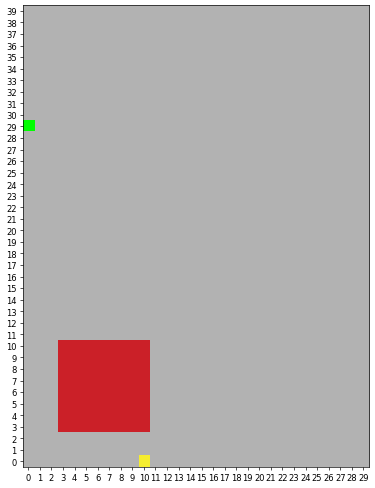

In [10]:
# make the grid
grid = make_grid()
# convert it to colors
plot_grid =dispGrid(grid,None)

fig=plt.figure(figsize=(10, 10), dpi= 60, facecolor='w', edgecolor='k')
# We have to invert the x and y axis , go over to numpy array instead
plt.imshow(np.swapaxes(np.array(plot_grid),0,1))
#plt.axis('on')
plt.gca().invert_yaxis()
plt.xticks(np.arange(0, size_grid_x, dtype=int))
plt.yticks(np.arange(0, size_grid_y, dtype=int))
plt.show()

## The following code cells you need to write yourself

Here we define the parameters used in the Q-learning algorithm, as described above. You should find the most suitable parameters yourself. 

The wind, which is not part of the Q-learning itself, but rather the environment is set to <code>wind=0.1</code>. 

In [11]:
# Define parameters. To find find suitable values may take some thought and experimentation, 
# with the goal that the agent learns the best way to get from start to finish
alpha= 0.1 #learning rate <1, if big it will train quickly, but also forget old experiences 
gamma= 0.95 #discounting rate <=1, how many steps ahead does it need to see?
epsilon= 0.5 #for the epsilon-greedy policy, the agent starts with no knowledge so it needs to explore to learn 
            #might be useful to decrease this as the agent learns more

wind=0.1 # chance that action results in random move instead of intended action



#### Q. 4.1.0 Comment your own code. Brief (one line) descriptions of each part of yuur own code is sufficient. (2 points)
The code I've written chooses an action as well as a move according to the epsilon-greedy principal and a probability of wind. Then the second function takes this function and uses it to update the position and Q in order to reach the goal. For further comments see comments in the code.

#### Q. 4.1.1 Briefly motivate your choice of the values of $\alpha, \gamma$ and $\epsilon$. (1 points)
### Answer
$\alpha$ is the learning rate of the algorithm. This also means that alpha can be seen as how much the model is allowed to change between iterations. Having a high learning rate can make the agent sensitive to individual runs sinced it is allowed to change too much. Having a low learning rate instead means slower learning. Having the value of 0.1 then means a stable model, while the learning not being too slow. This is the reasong for choosing 0.1 as the value.  $\newline$ $\newline$
$\gamma$ determines the "percentage" of the next move the model is able to see. Choosing 1 means that the model is able to see 1 whole step in to the future. The reasonable thing to do is then to choose 0.95, since giving the model more information should in theory result in a better result. This also means that the model prioratises future rewards over immidiate rewards, while not completely ignoring immidiate rewards.$\newline$ $\newline$
$\epsilon$ can be seen as a probability of exploration instead of exploitation. In order to utelize what the agent has learned this value should be low. This is because when using exploitation most of the time the agent moves more as it has learned previously. Furthermore, lowering the value of $\epsilon$ as the agent learns should improve the performance even more, since the agent is closer to the goal it has a lesser need of exploring the map.


As a first step you are asked to write a function <code>action_fcn(q_in,epsilon,wind)</code> which takes as input 
<code>q_in , epsilon, wind</code> and gives <code> move, action</code> as output.

The variable <code>q_in</code> are the action values for the four different actions 0,1,2,3 (corresponding to up,down,left,right) in a state given by the position of the agent. So if <code> position </code> is the current state <code> q_in=Q(position[0],position[1],:)</code>.

The output <code>action</code> should be the action selected according to the epsilon greedy procedure, i.e. 0,1,2 or 3. This action should be mapped to a <code>move</code> that specifies how to update <code> position </code>. However, we will also include wind which means that the actual move taken by the player should have a probability <code>wind</code> to be just a random move in any direction. Let <code>move</code> be the actual move performed when wind is taken into account. In other words, the agent will think it takes <code>action</code>, but it may actually take <code>move</code>, resulting in a different subsequent state and reward, than the agent intended.



In [12]:
def action_fcn(q_in,epsilon,wind):
    moves = [[0,1],[0,-1],[1,0],[-1,0]] #Define all possible moves
    
    action = np.random.randint(0,len(moves)) #Initialize random action
    if np.random.rand() > epsilon: # Use the probability epsilon of a random action 
        #(i.e not fulfilled chooses best action, exploitation instead of exploration)
        action = np.argmax(q_in) #Best action

    move = moves[action] # Choose move according to action
    
    if np.random.rand() < wind: #Probability of wind
        index = np.random.randint(0,len(moves)) #If wind -> random move is selected regardless of action
        move = moves[index]
    
    #select an epsilon greedy action based on q_in
    
    #construct the corresponding move. One way to implement this is match action 0, or Up, to array (0,1), 
    #action 1, down, to (0,-1) etc, making it easy to upgrade the postition, as position=position+move
    
    #test for wind, if True, make move random. 
        
    #Outout
    return move, action

#### Q. 4.1.2 What is the difference between epsilon and wind? Both can give random moves but describe fundamentally different aspects of the problem, how (2 points)?

### Answer
$\epsilon$ is the probability of exploration, while wind is a probability of choosing a random move regardless of what action have been selected. When the probability of exploration is fulfilled the two result in the same thing. The difference being the ideas behind the two concepts. Wind gives a random move, while the agent still acts according to the chosen action. This means that the calculations for the Q-table doesnt match with the move (in most cases, the wind can still result in the "correct" move being chosen). This can be seen as the agent having been blown to a different square and still acting as if it has taken the chosen move. In other words the wind introduces an uncertanty in to the world. Exploration however means that the agent is in full control of its movement. This meaning that the agent calculates the new Q-table correctly. In short, the agent is simply exploring the map.

The next step is to implement the actual learning learning algorithm, which consists of playing the game many times and learn the Q-function. To train the agent loop through a big number of games. Run each game until you go outside the grid, the 'cliff', or if you reach the goal. 

This training can be done in several steps, possible using different training parameters, epsilon, gamma, and alpha. Evaluate the progression using the evaluation routines at the end of the notebook. 
#### Q. 4.1.3 Document and describe (briefly) your successful complete training run in a text cell. Plot and discuss the final output from the evaluation routines. In particular, discuss how the effect of the wind can be seen in the results. (5 points)

### Answer
For this run the following variables were used. $\alpha$ = 0.1, $\epsilon$ = 0.5 (decreasing as the agent learned more, starting when more than half of games are completed, with a lower bound of 0.1) and $\gamma$ = 0.95. 

The training works as the following. The action and move are calculated using the function above. Later the position is updated as well as the current saved. Then the new status is retrieved in order to know how to update the Q-table. The reward is retrieved for the new position and finally the Q-table is updated according to the formula in the beginning of the assignment. (epsilon is then lowered between each game).

This results in the heat map below. The agent walks right and down to the right of the fire and then to the goal. It is clear from the heatmap as V(s) gets higher the closer the agent gets to the goal which is reasonable, as well as V(s) being very low on the brims of the map. This would correspond to places where the agent has previously walked of a cliff. 

Later on the path is printed as well as plotted. The effect of the wind is evident from the agent walking to the right of the fire. This is beacuse if the agent simply walked downwards the wind would have a high probability of blowing it off the cliff, since there are many moves to make along the brim in that case. This then results in the agent choosing a safer path, since the attempts at walking downwards often results in falling of the cliff and a low reward.

This can also be seen when the agent takes the path by the fire. The agent chooses to leave 1 square inbetween the chosen path and the fire. This is evidence of the wind, since when travelling next to the fire the wind has a probability of blowing the agent in to the fire resulting in a lower reward for this path. This is because the agent believes it is travelling next to the fire but the wind makes it so the calculations are done for being in the fire. Resulting in a safer path being chosen.

In [13]:
# loop over games
nr_of_games=10000
for game in range(nr_of_games):
    # Initilize the player at the start position and store the current position in position
    position=startpos
    status = -1 #Init status value
    # loop over steps taken by the player
    while status == -1:#the status of the game is -1, terminate if 1 (see status_list above)
        q_in = Q[position[0]][position[1]] #Define q for the current location
        
        # Find out what move to make using 
        move, action = action_fcn(q_in,epsilon,wind) #Use earlier function to retrieve move and action

        current_pos = position #Define current position
        position = position + move #Update position
        
        status = status_list[grid[position[0]][position[1]]] #Update status
        reward = reward_list[grid[position[0]][position[1]]] #Find reward value for new position

        if status == -1: #Check status to see how to update Q
            Q[current_pos[0]][current_pos[1]][action] = (1-alpha)*Q[current_pos[0]][current_pos[1]][action] + \
                alpha*(reward + gamma*np.max(Q[position[0]][position[1]])) #Update Q according to formula in the assignment
        else:
            Q[current_pos[0]][current_pos[1]][action] = reward #Update with only reward when action is to terminal state
    
        # update location, check grid,reward_list, and status_list 
        
        # Update Q, using one-step Q-learning according to the equation in the introduction. 
        # Remember that it is action that determines what entry of the Q-matris that should be updated, not move
        # If action is to a terminal state there is no next action, the Q function is then updated only by the reward
        # Take care in how it is defined at the boundary, make use of the fact that index -1 addresses last entry 
           
    if nr_of_games > 0.75*nr_of_games: #If epsilon is high lower it, because we want more exploitation when the model has learned more
            if epsilon < 0.1:
                 pass
            else:
                epsilon -= 0.01
    
    if game % 100 == 0:
        print(f'game nr= {game}')
        # You might want to print some more diagnostics here like max and min values of Q, which should be in the 
        # range of maximal and minimal rewards

game nr= 0
game nr= 100
game nr= 200
game nr= 300
game nr= 400
game nr= 500
game nr= 600
game nr= 700
game nr= 800
game nr= 900
game nr= 1000
game nr= 1100
game nr= 1200
game nr= 1300
game nr= 1400
game nr= 1500
game nr= 1600
game nr= 1700
game nr= 1800
game nr= 1900
game nr= 2000
game nr= 2100
game nr= 2200
game nr= 2300
game nr= 2400
game nr= 2500
game nr= 2600
game nr= 2700
game nr= 2800
game nr= 2900
game nr= 3000
game nr= 3100
game nr= 3200
game nr= 3300
game nr= 3400
game nr= 3500
game nr= 3600
game nr= 3700
game nr= 3800
game nr= 3900
game nr= 4000
game nr= 4100
game nr= 4200
game nr= 4300
game nr= 4400
game nr= 4500
game nr= 4600
game nr= 4700
game nr= 4800
game nr= 4900
game nr= 5000
game nr= 5100
game nr= 5200
game nr= 5300
game nr= 5400
game nr= 5500
game nr= 5600
game nr= 5700
game nr= 5800
game nr= 5900
game nr= 6000
game nr= 6100
game nr= 6200
game nr= 6300
game nr= 6400
game nr= 6500
game nr= 6600
game nr= 6700
game nr= 6800
game nr= 6900
game nr= 7000
game nr= 7100
game

## Diagnosis and plot routines

This first routine plots the state value function V(s). Use this during training to get information on the progression.
####  Q. 4.1.4 What information is contained in V(s)? How is it related to Q(s,a) (2p)?

### Answer
V(s) is the expected return of the state/position. It is related to Q(s,a) according to the following formula, V(s) = max_a (Q(s,a)). This formula tells us that V(s) is the maximum value of Q(s,a) for a given state while letting the action vary.

/var/folders/cp/1fyswsb14970zk63_lnn3vb40000gn/T/ipykernel_12477/2083018983.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(np.arange(0, size_grid_x, dtype=np.int))
/var/folders/cp/1fyswsb14970zk63_lnn3vb40000gn/T/ipykernel_12477/2083018983.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to

<Figure size 640x480 with 0 Axes>

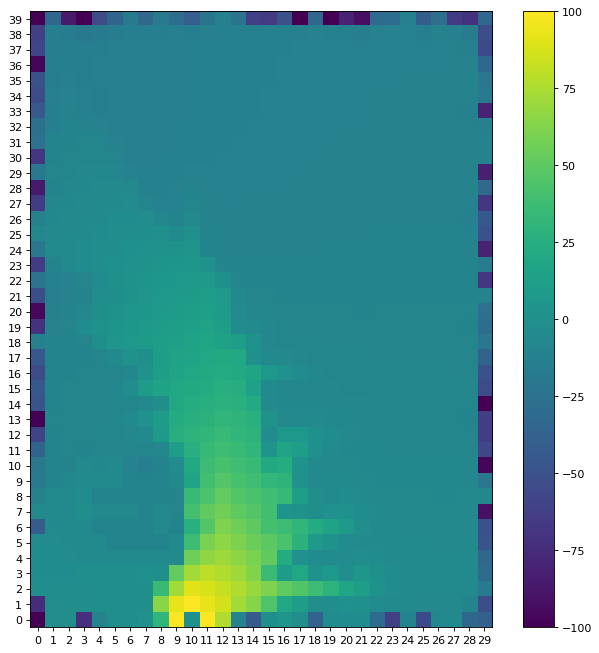

In [14]:
#Value function
z=Q.max(axis=2)
#z=z.T
#z=np.flip(z,axis=0)
#z=np.flip(z,axis=1)
plt.figure()
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(np.swapaxes(z,0,1))
plt.colorbar()
#plt.grid(False)
plt.gca().invert_yaxis()
plt.xticks(np.arange(0, size_grid_x, dtype=np.int))
plt.yticks(np.arange(0, size_grid_y, dtype=np.int))
plt.show()

These next routines find and plot the best paths found by the agent. Can also as training diagnostic. 
#### Q. 4.1.5 How is this best path related to the plot of the state value V(s) (2p)?

### Answer
The best path follows the plot of V(s), since the best path is the path which gives the highest reward and furthermore the highest expected return. This indicates that the code is working, since the agent wants to maximize the expected return which is based on previous games.

In [15]:
#a path
location=startpos
path=np.array([startpos])
reaction=0
step_count=0
while reaction !=1:
    q_state=Q[location[0],location[1],:]
    step_count+=1
    move, action = action_fcn(q_state,0.0,0.0)  #take optimal move
    location_new=location+move

    obstacle = grid[location_new[0]][location_new[1]]       
    reaction = status_list[obstacle]
    
    location=location_new
    
    path=np.append(path,[location],axis=0)
    if step_count>100:
        break
print(path,step_count)



[[ 0 29]
 [ 1 29]
 [ 2 29]
 [ 2 28]
 [ 3 28]
 [ 4 28]
 [ 4 27]
 [ 4 26]
 [ 5 26]
 [ 5 25]
 [ 6 25]
 [ 6 24]
 [ 6 23]
 [ 7 23]
 [ 8 23]
 [ 9 23]
 [ 9 22]
 [ 9 21]
 [ 9 20]
 [10 20]
 [10 19]
 [10 18]
 [10 17]
 [10 16]
 [10 15]
 [10 14]
 [11 14]
 [11 13]
 [11 12]
 [11 11]
 [12 11]
 [12 10]
 [12  9]
 [12  8]
 [12  7]
 [12  6]
 [12  5]
 [12  4]
 [12  3]
 [12  2]
 [11  2]
 [11  1]
 [10  1]
 [10  0]] 43


/var/folders/cp/1fyswsb14970zk63_lnn3vb40000gn/T/ipykernel_12477/1611915886.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xticks(np.arange(0, size_grid_x, dtype=np.int))
/var/folders/cp/1fyswsb14970zk63_lnn3vb40000gn/T/ipykernel_12477/1611915886.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to

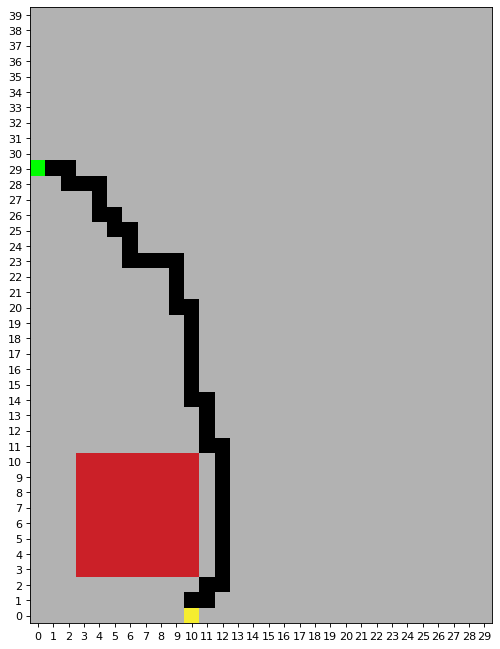

In [16]:
#plot above path
grid = make_grid()
plot_grid =dispGrid(grid,path)

fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
# We have to invert the x and y axis , go over to numpy array instead
plt.imshow(np.swapaxes(np.array(plot_grid),0,1))
#plt.axis('on')
plt.gca().invert_yaxis()
plt.xticks(np.arange(0, size_grid_x, dtype=np.int))
plt.yticks(np.arange(0, size_grid_y, dtype=np.int))
plt.show()